# Importing the Required Packages

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# Importing the Feeds Data and Cleaning the data

In [4]:
df=pd.read_csv("PH0100.csv")

In [5]:
df.head()

,created_at,entry_id,field1,field2,field3,field4,field5,latitude,longitude,elevation,status
0,2020-12-23 17:21:20 IST,1,23.56,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN
1,2020-12-23 18:39:28 IST,2,0.00,0.0,0.00,0.00,0.03,NaN,NaN,NaN,NaN
2,2020-12-23 18:44:40 IST,3,0.00,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN
3,2020-12-24 00:58:12 IST,4,20.62,0.2,81.82,89.23,3.33,NaN,NaN,NaN,NaN
4,2020-12-24 01:10:33 IST,5,20.62,0.2,81.40,88.78,3.33,NaN,NaN,NaN,NaN


In [10]:
headers=["Time_Stamp","Entry_ID","Temperature","TDS_VOltage","TDSwithoutT","TDSwithT","Water_Level","Latitude","Longitude","Elevation","Status"]

In [11]:
headers

['Time_Stamp',
 'Entry_ID',
 'Temperature',
 'TDS_VOltage',
 'TDSwithoutT',
 'TDSwithT',
 'Water_Level',
 'Latitude',
 'Longitude',
 'Elevation',
 'Status']

In [12]:
df.columns=headers

In [13]:
df.head()

,Time_Stamp,Entry_ID,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT,Water_Level,Latitude,Longitude,Elevation,Status
0,2020-12-23 17:21:20 IST,1,23.56,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN
1,2020-12-23 18:39:28 IST,2,0.00,0.0,0.00,0.00,0.03,NaN,NaN,NaN,NaN
2,2020-12-23 18:44:40 IST,3,0.00,0.0,0.00,0.00,0.00,NaN,NaN,NaN,NaN
3,2020-12-24 00:58:12 IST,4,20.62,0.2,81.82,89.23,3.33,NaN,NaN,NaN,NaN
4,2020-12-24 01:10:33 IST,5,20.62,0.2,81.40,88.78,3.33,NaN,NaN,NaN,NaN


In [14]:
dfplt=df[["Time_Stamp","Temperature","TDS_VOltage","TDSwithoutT","TDSwithT"]]

In [15]:
dfplt


,Time_Stamp,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT
0,2020-12-23 17:21:20 IST,23.56,0.00,0.00,0.00
1,2020-12-23 18:39:28 IST,0.00,0.00,0.00,0.00
2,2020-12-23 18:44:40 IST,0.00,0.00,0.00,0.00
3,2020-12-24 00:58:12 IST,20.62,0.20,81.82,89.23
4,2020-12-24 01:10:33 IST,20.62,0.20,81.40,88.78
...,...,...,...,...,...
1295,2021-01-04 11:33:26 IST,0.00,0.55,208.30,-12.20
1296,2021-01-04 11:43:51 IST,0.00,0.55,208.58,-12.22
1297,2021-01-04 11:54:17 IST,0.00,0.55,208.47,-12.21
1298,2021-01-04 12:04:42 IST,0.00,0.55,208.63,-12.22


In [16]:
df_plot=dfplt[dfplt["TDSwithoutT"]>170]

In [17]:
df_plot=df_plot[df_plot["TDSwithoutT"]<300]

In [18]:
df_plot["Temperature"]=df_plot["Temperature"].astype("float")


In [19]:
df_plot=df_plot[df_plot["Temperature"]>20]

In [20]:
df_plot=df_plot[df_plot["Temperature"]<30]

# Plotting the data from last 15 days

In [21]:
df_plot.dtypes

Time_Stamp      object
Temperature    float64
TDS_VOltage    float64
TDSwithoutT    float64
TDSwithT       float64
dtype: object

In [22]:
df_plot["Time_Stamp"]=df_plot["Time_Stamp"].astype('datetime64[ns, US/Eastern]')

C:\Users\suhas\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [23]:
df_plot.dtypes

Time_Stamp     datetime64[ns, US/Eastern]
Temperature                       float64
TDS_VOltage                       float64
TDSwithoutT                       float64
TDSwithT                          float64
dtype: object

In [24]:
df_plot.to_csv("FFEED_PH0100.csv")

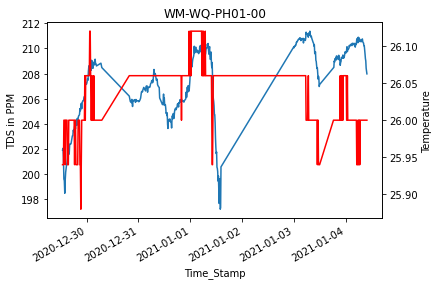

In [25]:
df_plot_main=df_plot.set_index('Time_Stamp')
ax1 = df_plot_main["TDSwithT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_plot_main["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-PH01-00")
plt.savefig('WM-WQ-PH01-01', dpi=600)

In [26]:
df_plot.describe()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT
count,459.000000,459.000000,459.000000,459.000000
mean,26.037124,0.559390,211.414662,207.449020
std,0.043819,0.009893,3.047920,2.976849
min,25.880000,0.530000,201.050000,197.200000
25%,26.000000,0.550000,209.740000,205.745000
50%,26.060000,0.560000,212.240000,208.250000
75%,26.060000,0.570000,214.100000,210.025000
max,26.120000,0.570000,215.270000,211.380000


# Plotting 1 Day Data :

In [27]:
df_oneday=df_plot_main.tail(144)

In [28]:
df_oneday.describe()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT
count,144.000000,144.000000,144.000000,144.000000
mean,26.009167,0.566875,213.861736,209.959653
std,0.031986,0.004651,0.980235,0.929722
min,25.940000,0.560000,210.540000,206.970000
25%,26.000000,0.560000,213.255000,209.260000
50%,26.000000,0.570000,214.140000,210.270000
75%,26.000000,0.570000,214.560000,210.712500
max,26.060000,0.570000,215.270000,211.380000


Text(0.5, 1.0, 'TDS Variation in One day')

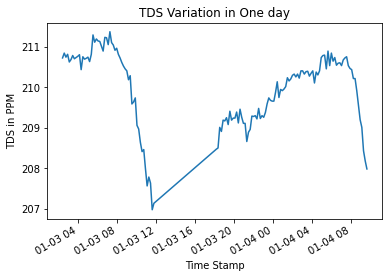

In [29]:
df_oneday["TDSwithT"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("TDS in PPM")
plt.title("TDS Variation in One day")

Text(0.5, 1.0, 'Temperature Variation in One day')

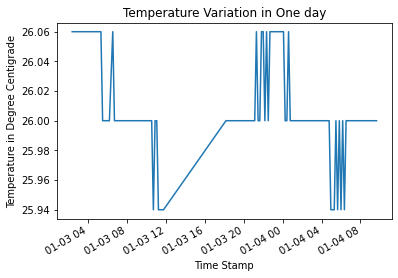

In [30]:
df_oneday["Temperature"].plot()
plt.xlabel("Time Stamp")
plt.ylabel("Temperature in Degree Centigrade")
plt.title("Temperature Variation in One day")

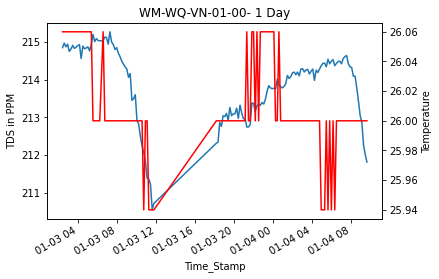

In [31]:

ax1 = df_oneday["TDSwithoutT"].plot()
plt.ylabel("TDS in PPM")
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('axes', 1.0))
df_oneday["Temperature"].plot(ax=ax2, color="red")
plt.ylabel("Temperature")
plt.title("WM-WQ-VN-01-00- 1 Day")
plt.savefig('WM-WQ-VN-01-01- 1 Day', dpi=600)

In [124]:
df_oneday.corr()

,Temperature,TDS_VOltage,TDSwithoutT,TDSwithT
Temperature,1.000000,0.059761,-0.616229,-0.674612
TDS_VOltage,0.059761,1.000000,0.671234,0.622873
TDSwithoutT,-0.616229,0.671234,1.000000,0.997075
TDSwithT,-0.674612,0.622873,0.997075,1.000000
